## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [2]:
Detail = pd.read_csv('Data/Player_Detail.csv')
Detail.head()

/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Position_Raw,Position_Clean,Shoots,Drafted_Team,Draft_Year,Round,Draft_Pick,Birth_Year,Birth_Month,Birth_Day,Birth_Country,Birth_State,Birth_City,Country,Height,Weight
0,13347.0,Doug Wickenheiser,C,C,L,Montréal Canadiens,1980.0,1.0,1.0,1961,3,30,CAN,SK,Regina,Canada,186.0,201.0
1,26300.0,Dave Babych,LD,LD,L,Winnipeg Jets,1980.0,1.0,2.0,1961,5,23,CAN,AB,Edmonton,Canada,188.0,220.0
2,21482.0,Denis Savard,C,C,R,Chicago Black Hawks,1980.0,1.0,3.0,1961,2,4,CAN,QC,Pointe Gatineau,Canada,178.0,170.0
3,21498.0,Larry Murphy,RD,RD,R,Los Angeles Kings,1980.0,1.0,4.0,1961,3,8,CAN,ON,Scarborough,Canada,188.0,209.0
4,26332.0,Darren Veitch,RD,RD,R,Washington Capitals,1980.0,1.0,5.0,1960,4,24,CAN,SK,Saskatoon,Canada,183.0,201.0


In [3]:
Detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126211 entries, 0 to 126210
Data columns (total 18 columns):
ID                126211 non-null float64
Name              126211 non-null object
Position_Raw      126211 non-null object
Position_Clean    126211 non-null object
Shoots            101374 non-null object
Drafted_Team      8595 non-null object
Draft_Year        8595 non-null float64
Round             8595 non-null float64
Draft_Pick        8595 non-null float64
Birth_Year        126211 non-null int64
Birth_Month       126211 non-null int64
Birth_Day         126211 non-null int64
Birth_Country     95976 non-null object
Birth_State       63839 non-null object
Birth_City        94578 non-null object
Country           126017 non-null object
Height            115808 non-null float64
Weight            115696 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 17.3+ MB


In [4]:
Junior = pd.read_csv('Data/Player_Junior_Stats.csv')
Junior.head()

,ID,Name,Season,Age,Team,Captaincy,League,GP,G,A,TP,PIM,X...
0,13347.0,Doug Wickenheiser,1977-78,17.463014,Regina Pats,NaN,WCHL,68,37.0,51.0,88.0,49.0,NaN
1,13347.0,Doug Wickenheiser,1978-79,18.463014,Regina Pats,NaN,WHL,68,32.0,62.0,94.0,141.0,NaN
2,13347.0,Doug Wickenheiser,1979-80,19.463014,Regina Pats,C,WHL,71,89.0,81.0,170.0,99.0,NaN
3,13347.0,Doug Wickenheiser,1980-81,20.463014,MontrÃ©al Canadiens,NaN,NHL,41,7.0,8.0,15.0,20.0,5.0
4,13347.0,Doug Wickenheiser,1981-82,21.463014,MontrÃ©al Canadiens,NaN,NHL,56,12.0,23.0,35.0,43.0,18.0


In [5]:
Junior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839025 entries, 0 to 839024
Data columns (total 13 columns):
ID           839025 non-null float64
Name         839025 non-null object
Season       839025 non-null object
Age          839025 non-null float64
Team         839025 non-null object
Captaincy    26720 non-null object
League       839025 non-null object
GP           839025 non-null int64
G            838686 non-null float64
A            838216 non-null float64
TP           838241 non-null float64
PIM          814251 non-null float64
X...         335374 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 83.2+ MB


In [6]:
NHL = pd.read_csv('Data/Player_NHL_Stats.csv')
NHL.head()

,ID,Name,Season,Age,Team,League,NHL_GP,NHL_G,NHL_A,NHL_TP,...,NHL_TGF,NHL_PGF,NHL_TGA,NHL_PGA,NHL_PM,NHL_OPS,NHL_DPS,NHL_PS,NHL_xGF,NHL_xGA
0,13347,Doug Wickenheiser,1980-81,19,MTL,NHL,41,7,8,15,...,24,5,14,0,5,-0.1,0.7,0.6,NaN,NaN
1,13347,Doug Wickenheiser,1981-82,20,MTL,NHL,56,12,23,35,...,56,11,27,0,18,0.9,1.1,1.9,NaN,NaN
2,13347,Doug Wickenheiser,1982-83,21,MTL,NHL,78,25,30,55,...,88,14,52,0,18,2.7,1.2,3.9,NaN,NaN
3,13347,Doug Wickenheiser,1983-84,22,TOT,NHL,73,12,26,38,...,57,10,59,23,9,0.6,1.3,1.9,NaN,NaN
4,13347,Doug Wickenheiser,1984-85,23,STL,NHL,68,23,20,43,...,60,5,76,30,10,2.0,1.1,3.1,NaN,NaN


In [7]:
NHL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25674 entries, 0 to 25673
Data columns (total 38 columns):
ID          25674 non-null int64
Name        25674 non-null object
Season      25674 non-null object
Age         25674 non-null int64
Team        25674 non-null object
League      25674 non-null object
NHL_GP      25674 non-null int64
NHL_G       25674 non-null int64
NHL_A       25674 non-null int64
NHL_TP      25674 non-null int64
NHL_PIM     25674 non-null int64
NHL_S       25674 non-null int64
NHL_TSA     10629 non-null float64
NHL_TOI     17611 non-null float64
NHL_FOW     10629 non-null float64
NHL_FOL     10629 non-null float64
NHL_BLK     10629 non-null float64
HIT         10638 non-null float64
NHL_TK      10638 non-null float64
NHL_GV      10638 non-null float64
Awards      3295 non-null object
NHL_CF      10638 non-null float64
NHL_CA      10638 non-null float64
NHL_FF      10638 non-null float64
NHL_FA      10638 non-null float64
NHL_oiGF    10637 non-null float64
NHL

## Response Variable Exploration

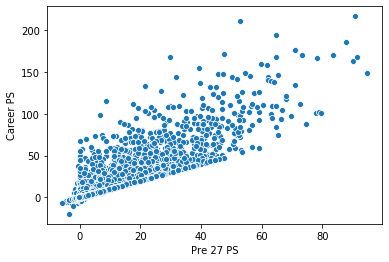

In [8]:
#scatter plot of Point-Shares before they turned 27 vs career
pre_27_PS = NHL[NHL['Age'] < 27].groupby('ID')['NHL_PS'].sum().reset_index().rename(columns={'NHL_PS':'Pre 27 PS'})
career_PS = NHL.groupby(['ID', 'Name'])['NHL_PS'].sum().reset_index().rename(columns={'NHL_PS':'Career PS'})
pre_27_career_PS = career_PS.set_index('ID').join(pre_27_PS.set_index('ID'), how='left').fillna(0)
sns.scatterplot(data=pre_27_career_PS, x = 'Pre 27 PS', y = 'Career PS')

## Single League (OHL) Modeling Exploration

In [9]:
OHL = Junior[(Junior['League'] == 'OHL') & (Junior['Age'] < 19) & (Junior['Age'] >= 18)]
OHL = OHL[['ID', 'Name', 'Season', 'Age', 'Team', 'Captaincy', 'GP', 'G', 'A', 'TP']]
OHL['GPG'] = OHL['G']/OHL['GP']
OHL['APG'] = OHL['A']/OHL['GP']
OHL['PPG'] = OHL['TP']/OHL['GP']
OHL['Season Start'] = OHL['Season'].apply(lambda s: int(s.split('-')[0]))
OHL['Captaincy'] = np.where(OHL['Captaincy'] == 'C', 1, 0)
OHL.set_index('ID', inplace=True)
OHL.head()

,Name,Season,Age,Team,Captaincy,GP,G,A,TP,GPG,APG,PPG,Season Start
ID,,,,,,,,,,,,,
98800.0,Tony Curtale,1980-81,18.627397,Brantford Alexanders,0,59,14.0,71.0,85.0,0.237288,1.203390,1.440678,1980
26899.0,Doug Smith,1980-81,18.331507,Ottawa 67's,0,54,45.0,56.0,101.0,0.833333,1.037037,1.870370,1980
21347.0,Ron Francis,1980-81,18.542466,Sault Ste. Marie Greyhounds,0,64,26.0,43.0,69.0,0.406250,0.671875,1.078125,1980
51000.0,Joe Cirella,1980-81,18.268493,Oshawa Generals,0,56,5.0,31.0,36.0,0.089286,0.553571,0.642857,1980
40926.0,Mark Hunter,1980-81,18.841096,Brantford Alexanders,0,53,39.0,40.0,79.0,0.735849,0.754717,1.490566,1980


In [10]:
OHL = OHL.join(pre_27_PS.set_index('ID')['Pre 27 PS'], how='left')
NHLGP = NHL[NHL['Age']<27].groupby('ID')['NHL_GP'].sum()
OHL = OHL.join(NHLGP, how='left')
OHL['NHL_GP'] = OHL['NHL_GP'].fillna(0)
OHL['NHL PS'] = OHL['Pre 27 PS'].apply(lambda x: round(x, 2)).fillna(0)
OHL = OHL.join(Detail.set_index('ID')[['Position_Clean', 'Height', 'Weight']], how='left')
OHL = OHL[(OHL['Season Start'] >= 1998) & (OHL['Season Start'] <= 2010) & (OHL['Height'].notna())]
OHL['Defense'] = np.where(OHL['Position_Clean'].str.contains('D').tolist(), 0, 1)
OHL.head()

,Name,Season,Age,Team,Captaincy,GP,G,A,TP,GPG,APG,PPG,Season Start,Pre 27 PS,NHL_GP,NHL PS,Position_Clean,Height,Weight,Defense
ID,,,,,,,,,,,,,,,,,,,,
2489.0,Aaron Lobb,2000-01,18.265753,London Knights,0,67,23.0,25.0,48.0,0.343284,0.373134,0.716418,2000,NaN,0.0,0.0,RW,193.0,209.0,1
3236.0,Samu Isosalo,1998-99,18.265753,North Bay Centennials,0,59,13.0,12.0,25.0,0.220339,0.203390,0.423729,1998,NaN,0.0,0.0,C,194.0,225.0,1
3656.0,Eric Staal,2002-03,18.882192,Peterborough Petes,0,66,39.0,59.0,98.0,0.590909,0.893939,1.484848,2002,56.6,560.0,56.6,C,193.0,209.0,1
3657.0,Nathan Horton,2002-03,18.298630,Oshawa Generals,0,54,33.0,35.0,68.0,0.611111,0.648148,1.259259,2002,45.2,548.0,45.2,RW,188.0,229.0,1
3658.0,Rick Nash,2001-02,18.249315,London Knights,0,54,32.0,40.0,72.0,0.592593,0.740741,1.333333,2001,59.3,592.0,59.3,LW,193.0,212.0,1


In [11]:
#Preparing data for model DFs
Train = OHL[OHL['Season Start'] <= 2008]
TrainY = Train['NHL PS']
TrainX = Train[['Defense', 'Height', 'Weight', 'Age', 'Captaincy', 'GP', 'GPG', 'APG', 'PPG']]
Test = OHL[OHL['Season Start'] > 2008]
TestY = Test['NHL PS']
TestX = Test[['Defense', 'Height', 'Weight', 'Age', 'Captaincy', 'GP', 'GPG', 'APG', 'PPG']]
TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1602 entries, 2489.0 to 252095.0
Data columns (total 9 columns):
Defense      1602 non-null int64
Height       1602 non-null float64
Weight       1602 non-null float64
Age          1602 non-null float64
Captaincy    1602 non-null int64
GP           1602 non-null int64
GPG          1602 non-null float64
APG          1602 non-null float64
PPG          1602 non-null float64
dtypes: float64(6), int64(3)
memory usage: 125.2 KB


### Data Exploration

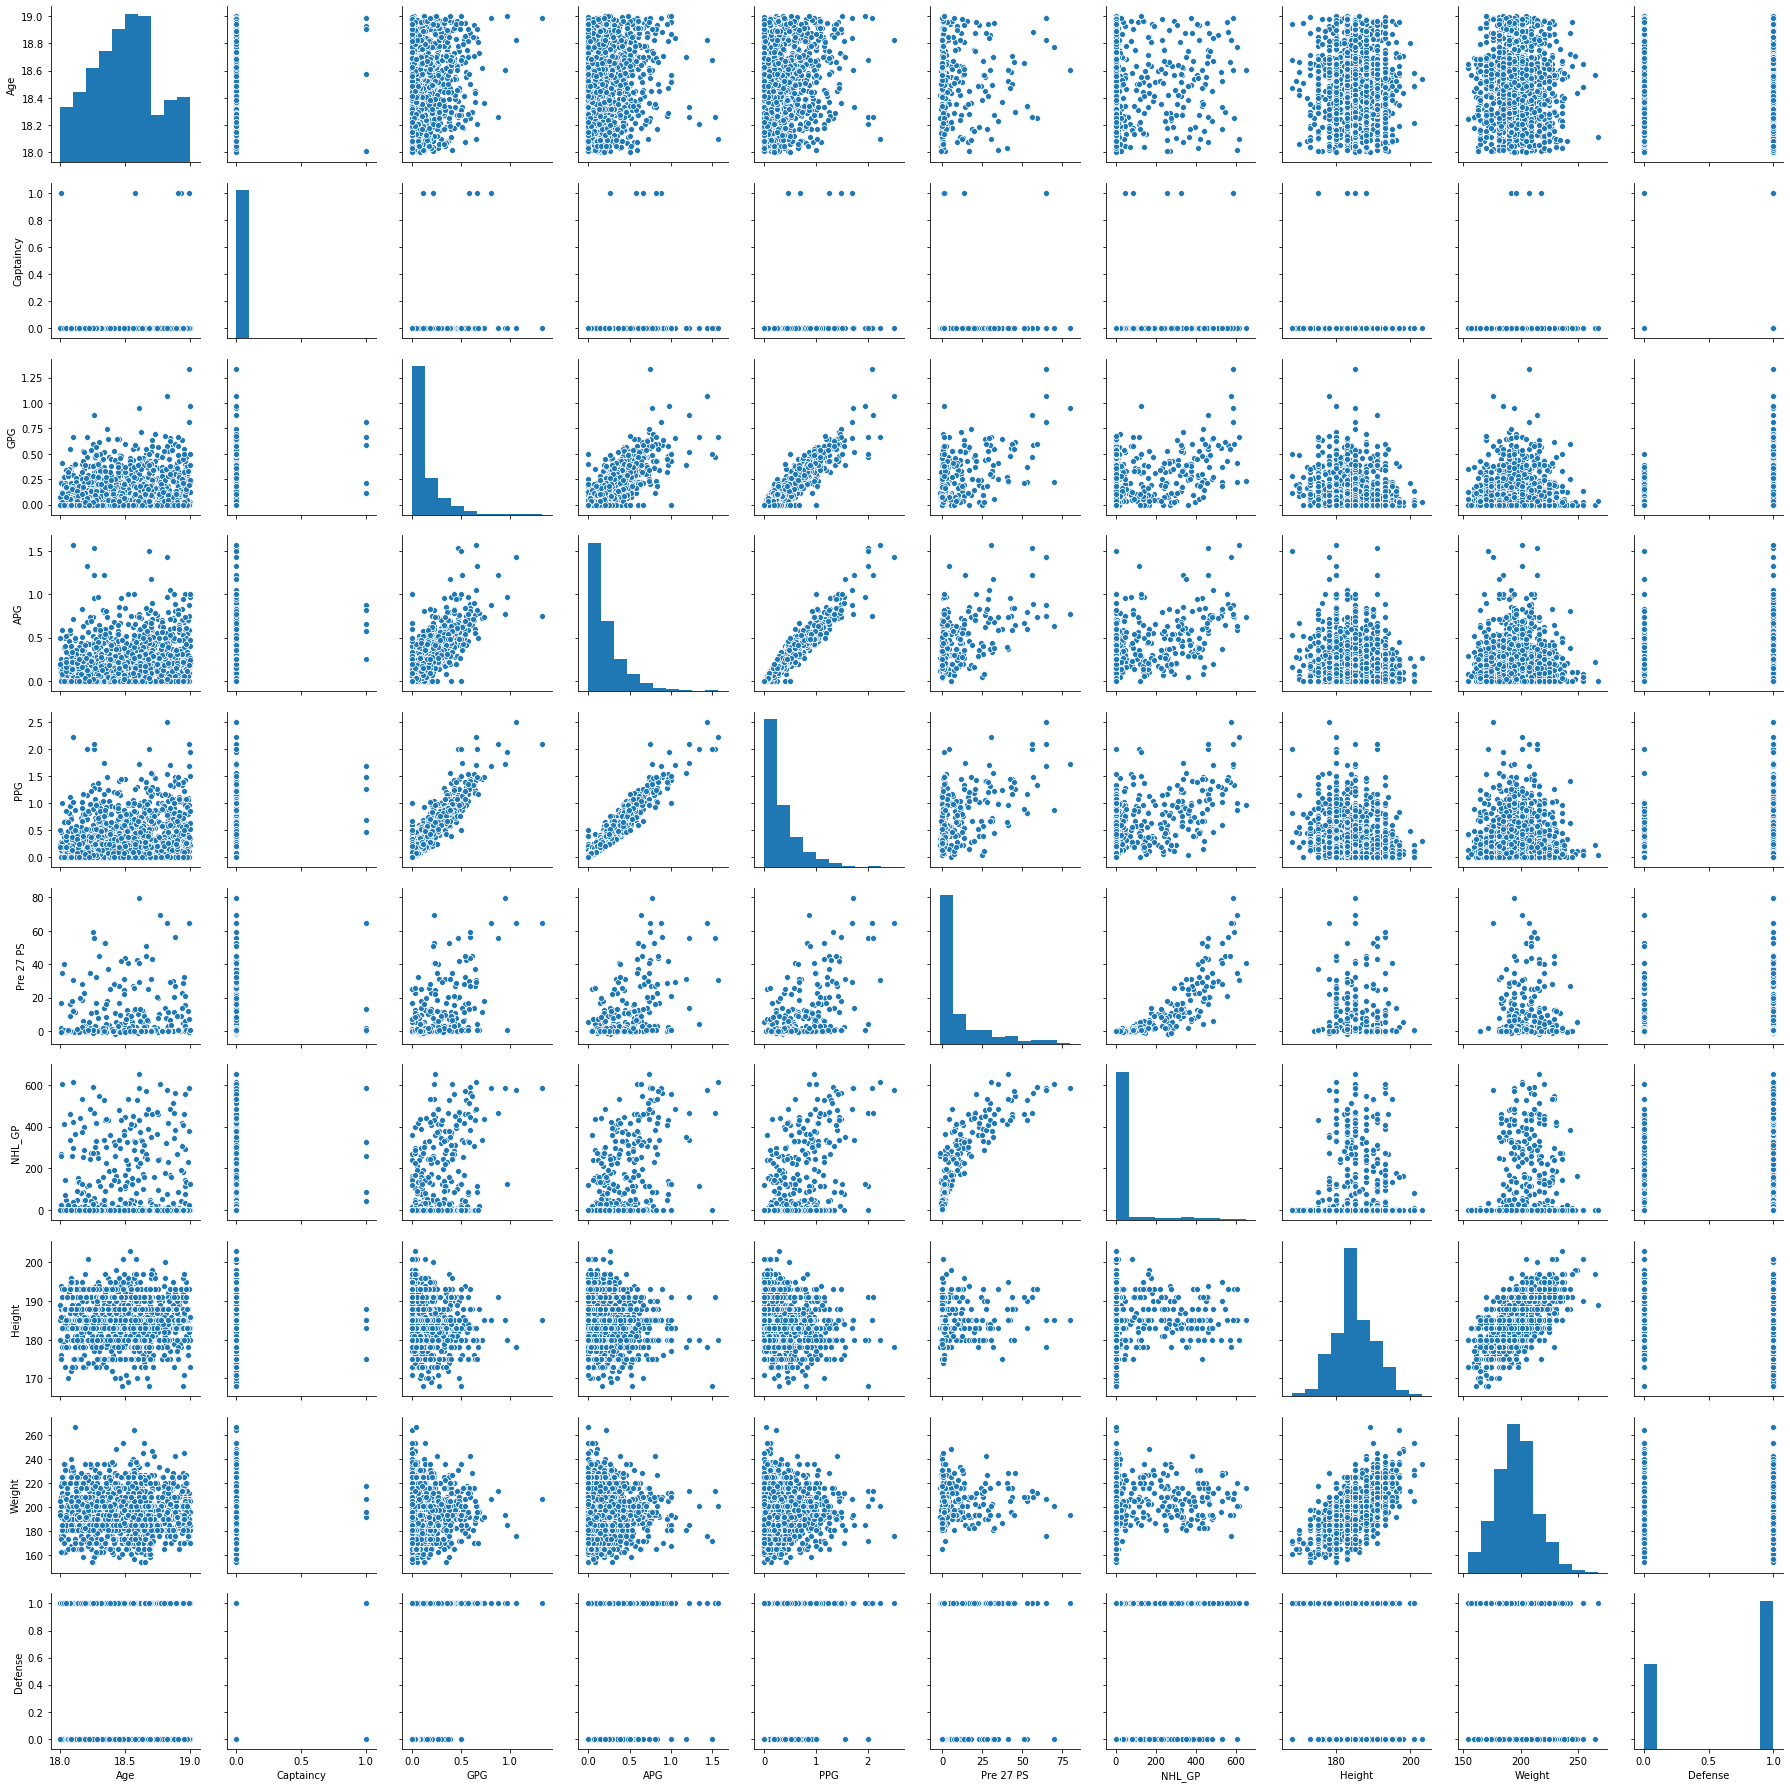

In [22]:
Mess = Train[['Age', 'Captaincy', 'GPG', 'APG', 'PPG', 'Pre 27 PS', 'NHL_GP', 'Height', 'Weight', 'Defense']]

sns.pairplot(Mess)

/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


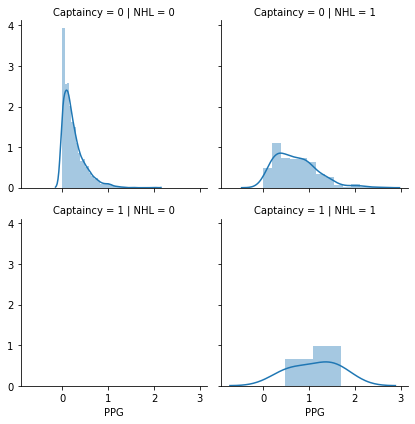

In [26]:
Mess['NHL'] = np.where(Mess['NHL_GP'] == 0., 0, 1)
g = sns.FacetGrid(data=Mess, row='Captaincy', col='NHL')
g.map(sns.distplot, 'PPG')

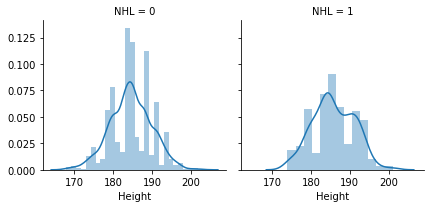

In [28]:
g = sns.FacetGrid(data=Mess, col='NHL')
g.map(sns.distplot, 'Height')

In [52]:
Progression = Junior[Junior['League'] == 'OHL'].set_index('ID')
Progression = Progression.join(pre_27_PS.set_index('ID')['Pre 27 PS'], how='left')
Progression = Progression.join(NHLGP, how='left')
Progression['Age_Trunc'] = Progression['Age'].apply(lambda x: int(x))
Progression['Season Start'] = Progression['Season'].apply(lambda s: int(s.split('-')[0]))
Progression['PPG'] = Progression['TP']/Progression['GP']
Progression['NHL_GP'].fillna(0, inplace=True)
Progression['Pre 27 PS'].fillna(0, inplace=True)
Temp = Progression[(Progression['Age']>18) & (Progression['Age']<=19) & 
                   (Progression['Season Start']>=1998) & (Progression['Season Start']<=2010)].copy()
Temp['Temp'] = 1
Temp = Temp[['Temp']]
Progression = Progression.join(Temp, how='inner')
Progression = Progression.join(Detail.set_index('ID')[['Position_Clean']], how='left')
Progression['NHL'] = np.where(Progression['NHL_GP'] == 0, 0, 1)
Progression = Progression[['Name', 'Position_Clean', 'Age_Trunc', 'PPG', 'Pre 27 PS', 'NHL']].reset_index()
Progression.head()

,ID,Name,Position_Clean,Age_Trunc,PPG,Pre 27 PS,NHL
0,2489.0,Aaron Lobb,RW,17,0.189655,0.0,0
1,2489.0,Aaron Lobb,RW,18,0.716418,0.0,0
2,2489.0,Aaron Lobb,RW,19,0.300000,0.0,0
3,2489.0,Aaron Lobb,RW,19,1.000000,0.0,0
4,2489.0,Aaron Lobb,RW,20,0.550000,0.0,0


In [133]:
Progression = Junior[Junior['League'] == 'OHL'].set_index('ID')
Progression['Season Start'] = Progression['Season'].apply(lambda s: int(s.split('-')[0]))
Temp = Progression[(Progression['Age']>18) & (Progression['Age']<=19) & 
                   (Progression['Season Start']>=1998) & (Progression['Season Start']<=2010)].copy()
Temp['Temp'] = 1
Temp = Temp[['Temp']]
Progression = Progression.join(Temp, how='inner').reset_index()
P = Progression.groupby(['ID', 'Age'])['TP'].sum()
GP = Progression.groupby(['ID', 'Age'])['GP'].sum()
Progression = pd.DataFrame(P).join(pd.DataFrame(GP), how='inner').reset_index().set_index('ID')
Progression['PPG'] = Progression['TP']/Progression['GP']
Progression = Progression.join(pre_27_PS.set_index('ID')['Pre 27 PS'], how='left')
Progression = Progression.join(NHLGP, how='left')
Progression = Progression.join(Detail.set_index('ID')[['Name', 'Position_Clean', 'Height', 'Weight']], how='left')
Progression['NHL_GP'].fillna(0, inplace=True)
Progression['Pre 27 PS'].fillna(0, inplace=True)
Progression['Age_Trunc'] = Progression['Age'].apply(lambda x: int(x))
Progression = Progression[['Name', 'Age', 'Age_Trunc', 'Position_Clean', 'Height', 'Weight', 'PPG', 'Pre 27 PS', 'NHL_GP']]
Progression.head()
#check Dashboard for exploration of this dataset

,Name,Age,Age_Trunc,Position_Clean,Height,Weight,PPG,Pre 27 PS,NHL_GP
ID,,,,,,,,,
2489.0,Aaron Lobb,17.265753,17,RW,193.0,209.0,0.189655,0.0,0.0
2489.0,Aaron Lobb,18.265753,18,RW,193.0,209.0,0.716418,0.0,0.0
2489.0,Aaron Lobb,19.265753,19,RW,193.0,209.0,0.588235,0.0,0.0
2489.0,Aaron Lobb,20.265753,20,RW,193.0,209.0,0.550000,0.0,0.0
2489.0,Aaron Lobb,21.265753,21,RW,193.0,209.0,0.390625,0.0,0.0


In [134]:
Jump = Progression.copy().reset_index()
Jump['Age_Trunc'] = Jump['Age_Trunc'].apply(lambda x: str(x))
Jump = Jump.pivot(index='ID', columns='Age_Trunc', values='PPG')
Jump['Jump 17 18'] = Jump['18']-Jump['17']
Jump['Jump 18 19'] = Jump['19']-Jump['18']
Jump = Jump[['Jump 17 18', 'Jump 18 19']]
Jump.columns.name = None
Progression = Progression.join(Jump, how='left')
Jump.head()

,Jump 17 18,Jump 18 19
ID,,
2489.0,0.526763,-0.128183
3236.0,NaN,0.451271
3656.0,0.377706,NaN
3657.0,0.212384,NaN
3658.0,0.195402,NaN


In [135]:
Progression.to_csv('Tableau/OHL Progression.csv')

### Binary Classification of Playing game in NHL

In [13]:
GPTrainY = np.where(Train['NHL_GP'].apply(lambda x: x == 0.), 0, 1)
GPTestY = np.where(Test['NHL_GP'].apply(lambda x: x == 0.), 0, 1)

#### Logistic Regression

In [14]:
Logistic = LogisticRegressionCV(Cs=10, l1_ratios=np.linspace(0,1, 11), cv=5, 
                                penalty='elasticnet', solver='saga', n_jobs=-1)
Logistic.fit(TrainX, GPTrainY)

/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Conver

/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Matthew/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Conver

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     max_iter=100, multi_class='warn', n_jobs=-1,
                     penalty='elasticnet', random_state=None, refit=True,
                     scoring=None, solver='saga', tol=0.0001, verbose=0)

In [18]:
Logistic.l1_ratio_

array([0.])